### cifar10 classification

In [1]:
import dl2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = dl2.normalize(x_train), dl2.normalize(x_test)
y_train, y_test = dl2.onehot(y_train, 10), dl2.onehot(y_test, 10)

### Initialize and train LeNet-5

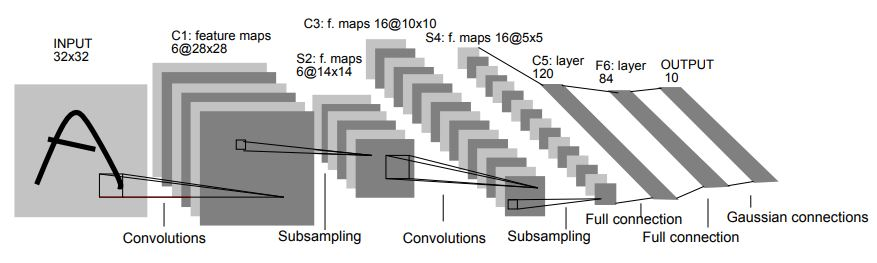

In [3]:
Image(filename='LeNet-5.jpg')

In [4]:
cnn = dl2.NN()
cnn.add(dl2.conv2d(filters=6, filters_dim=(5, 5), strides=(1, 1), input_dim=(32, 32, 3)))
cnn.add(dl2.max_pool(pool_size=(2, 2), strides=(2, 2)))
cnn.add(dl2.conv2d(filters=16, filters_dim=(5, 5), strides=(1, 1)))
cnn.add(dl2.max_pool(pool_size=(2, 2), strides=(2, 2)))
cnn.add(dl2.flatten())
cnn.add(dl2.dense(120, activation='relu'))
cnn.add(dl2.dense(84, activation='relu'))
cnn.add(dl2.dense(10, activation='softmax'))
cnn.init()
cnn.info()

{'input_dim': (32, 32, 3), 'output_dim': (28, 28, 6), 'use_bias': True, 'filters': 6, 'filters_dim': (5, 5), 'strides': (1, 1), 'layer': 'conv2d', 'activation': 'none', 'requires_wgrad': True}
{'input_dim': (28, 28, 6), 'output_dim': (14, 14, 6), 'pool_size': (2, 2), 'strides': (2, 2), 'layer': 'max_pool', 'activation': 'none'}
{'input_dim': (14, 14, 6), 'output_dim': (10, 10, 16), 'use_bias': True, 'filters': 16, 'filters_dim': (5, 5), 'strides': (1, 1), 'layer': 'conv2d', 'activation': 'none', 'requires_wgrad': True}
{'input_dim': (10, 10, 16), 'output_dim': (5, 5, 16), 'pool_size': (2, 2), 'strides': (2, 2), 'layer': 'max_pool', 'activation': 'none'}
{'input_dim': (5, 5, 16), 'output_dim': 400, 'use_bias': True, 'layer': 'flatten', 'activation': 'none'}
{'input_dim': 400, 'output_dim': 120, 'layer': 'dense', 'activation': 'relu', 'use_bias': True, 'requires_wgrad': True}
{'input_dim': 120, 'output_dim': 84, 'layer': 'dense', 'activation': 'relu', 'use_bias': True, 'requires_wgrad': 

In [5]:
cnn.opt, cnn.loss_fn = dl2.Adagrad(cnn.params(), 1e-2), 'ce'
history = cnn.fit(x_train, y_train, epochs=3, batch_size=32, shuffle=True)

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [26:56<00:00, 30.93it/s]


In [6]:
dl2.accuracy(cnn, x_test, y_test, False)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:25<00:00, 116.84it/s]


59.95